<a href="https://colab.research.google.com/github/GowriShankarG/MTech_AIML/blob/master/ACI_Assignment_1_SolutionTemplate_S1_24_Version01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial and Computational Intelligence Assignment 1

## Problem solving by Uninformed & Informed Search

List all the team members BITS ID ,Name along with % of contribution in this assignment: sample Provided below:
1. ___________________
2. __________________
3. ____________________
4. ___________________
5. ___________________

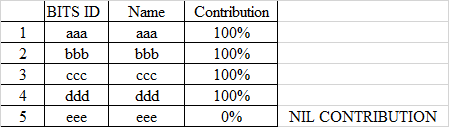

Things to follow
1.	Use appropriate data structures to represent the graph and the path using python libraries
2.	Provide proper documentation
3.	Find the path and print it

Coding begins here

### 1.	Define the environment in the following block

List the PEAS decription of the problem here in this markdown block

Design the agent as PSA Agent(Problem Solving Agent)
Clear Initial data structures to define the graph and variable declarations is expected
IMPORTATANT: Write distinct code block as below

In [8]:
import random # used in random restart alog code

In [9]:
# Initial Data strucuture for matrix cave for the use case and variables

# the following matix represent grid structure of the cave given in the problem
# each cell data the data properties of the cel
# ### first 4 digits of the cell provide wall details in each direction () west,east, north,south)
# ### if wall then = 1, if no wall = 0
# ### fifth digit of the cell represent the Fire = F, Bush = B or None = N
cavegrid = [
  ['1010B', '0011N', '0100N', '1011N', '0011N', '0110F'],
  ['1100N', '1110N', '1000N', '0011N', '0110B', '1100N'],
  ['1100N', '1001N', '0100N', '1011F', '0001N', '0100N'],
  ['1000N', '0111F', '1100N', '1010N', '0011N', '0101N'],
  ['1100N', '1010B', '0001N', '0001N', '0010N', '0110B'],
  ['1101N', '1000N', '0011N', '0110N', '1100N', '1100N'],
  ['1011N', '0101N', '1011N', '0001N', '0100N', '1101N']
  ]


# Size of cave / GridSize
gridsize = (len(cavegrid),len(cavegrid[0]))
#print("Dubug : cave grid size => "+str(gridsize))

In [10]:
# Defining Node class to derive various objectives
# CaveGrid Cell details
class Node:
    '''
    class to provide the details of the node in the cave grid
    '''
    def __init__(self, nodeDtls, currNodePos, goalNodePos, gridSize):
        self.nodeWallDtl = nodeDtls[0:4] # first 4 digits for west,east, north,south wall info
        self.nodeObstacle = nodeDtls[4:5]
        self.currNodePos = currNodePos
        self.xpos = currNodePos[0]
        self.ypos = currNodePos[1]
        self.goal_xpos = goalNodePos[0]
        self.goal_ypos = goalNodePos[1]
        self.grid_rows = gridSize[0]
        self.grid_cols = gridSize[1]

    def isWestSideAllowed(self):
        if self.nodeWallDtl[0] == '1': # 1 digit for West
            return False
        else:
            return True

    def isEastSideAllowed(self):
        if self.nodeWallDtl[1] == '1': # 2 digit for East
            return False
        else:
            return True

    def isNorthSideAllowed(self):
        if self.nodeWallDtl[2] == '1': # 3 digit for North
            return False
        else:
            return True

    def isSouthSideAllowed(self):
        if self.nodeWallDtl[3] == '1': # 4 digit for South
            return False
        else:
            return True


    def getNeigbors(self):
      ''' get the neigbors of the current node
      '''
      westNeigbor = (self.xpos, self.ypos-1)
      eastNeigbor = (self.xpos, self.ypos+1)
      northNeigbor = (self.xpos-1, self.ypos)
      southNeigbor = (self.xpos+1, self.ypos)

      # checking if the neigbors are out of grid size and if any wall exists
      # ignore neibor if it is outside of the grid and wall exits
      #print( "negibor values before  checking grid ==>"+str(westNeigbor)+","+str(eastNeigbor)+","+str(northNeigbor)+","+str(southNeigbor))
      if ((westNeigbor[0] < 0 or westNeigbor[0] >= self.grid_rows or westNeigbor[1] < 0 or westNeigbor[1] >= self.grid_cols) or (self.isWestSideAllowed()==False)):
        westNeigbor = None

      if (eastNeigbor[0] < 0 or eastNeigbor[0] >= self.grid_rows or eastNeigbor[1] < 0 or eastNeigbor[1] >= self.grid_cols or (self.isEastSideAllowed() == False)):
        eastNeigbor = None

      if (northNeigbor[0] < 0 or northNeigbor[0] >= self.grid_rows or northNeigbor[1] < 0 or northNeigbor[1] >= self.grid_cols or (self.isNorthSideAllowed() == False)):
        northNeigbor = None

      if (southNeigbor[0] < 0 or southNeigbor[0] >= self.grid_rows or southNeigbor[1] < 0 or southNeigbor[1] >= self.grid_cols or (self.isSouthSideAllowed() == False)):
        southNeigbor = None

      neibors = [westNeigbor,eastNeigbor,northNeigbor,southNeigbor]
      # remove neibors with values as none
      neibors = [x for x in neibors if x is not None]

      return neibors


    def nodeDebugInfo(self):
        '''
        node info for debugging purpose
        '''
        print("        -----------------------------------------[DEBUG]--------------------------------------------------------------------------")
        print("        ")
        print("        Current Node Position     ==> ("+str(self.xpos)+","+str(self.ypos)+")")
        print("        Node wall Info           ==> "+self.nodeWallDtl)
        print("        Node Obstacle Info       ==> "+self.nodeObstacle)
        print("        Goal Node Position        ==> ("+str(self.goal_xpos)+","+str(self.goal_ypos)+")")
        print("        Is West side allowed     ==> "+str(self.isWestSideAllowed()))
        print("        Is East side allowed     ==> "+str(self.isEastSideAllowed()))
        print("        Is North side allowed    ==> "+str(self.isNorthSideAllowed()))
        print("        Is South side allowed    ==> "+str(self.isSouthSideAllowed()))
        print("         -----------------------North->"+str(self.isNorthSideAllowed())+"<------------------------------")
        print("             West->"+str(self.isWestSideAllowed())+"<                       EAST->"+str(self.isEastSideAllowed())+"<  ")
        print("         -----------------------South->"+str(self.isSouthSideAllowed())+"<------------------------------")
        print("        ")
        print("        ---------------------------------------[END DEBUG]----------------------------------------------------------------------------")
        return

In [11]:
#Code Block : Set Initial State (Must handle dynamic inputs)

# node object of the initial state, at start node = (0,2) position
def initState(StartNode):
  return Node(cavegrid[StartNode[0]][StartNode[1]], StartNode, GoalNode, (len(cavegrid),len(cavegrid[0])))


In [12]:
#Code Block : Set the matrix for transition & cost (as relevant for the given problem)


# heuristic function = manhattan distance for the given problem
# h(n)
def heurfunc_hx(nodeObj):
    return abs(nodeObj.goal_xpos - nodeObj.xpos) + abs(nodeObj.goal_ypos - nodeObj.ypos)

# transition function cost
# g(n)
def costfunc_gx(nodeObj):
  vgx=0
  if nodeObj.nodeObstacle == 'N':
    vgx=3 # only node movement cost
  elif nodeObj.nodeObstacle == 'B':
    vgx=4 # node movement cost and bush cost (=3+1)
  elif nodeObj.nodeObstacle == 'F':
    vgx=8 # node movement cost and Fire cost (=3+5)
  else:
    vgx=9999 # unknown scenario. high cost is assigned
  return vgx

# the overall cost for f(n) = g(n)+h(n)
def overallCostFunc_fx(nodeObj):
    return costfunc_gx(nodeObj) + heurfunc_hx(nodeObj)

In [13]:
#Code Block : Write function to design the Transition Model/Successor function. Ideally this would be called while search algorithms are implemented

# get the successor from the current cell
def getFavarableNode(openset):
  ''' get the favarable node and its cost from the openset
  '''
  # apply node class on each item of openset and get least overall cost function
  favarableNode = openset[0].get('item')
  favarableNodeCost = openset[0].get('fncost')
  favarableParent = openset[0].get('parent')
  tmpFavNd = Node(cavegrid[favarableNode[0]][favarableNode[1]],favarableNode,GoalNode,gridsize)

  for item in openset:
    vitem = item.get('item')
    #print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    #print("Dubug : item => "+str(item))
    tmpNd = Node(cavegrid[vitem[0]][vitem[1]],vitem,GoalNode,gridsize)
    #tmpNd.nodeDebugInfo()
    if overallCostFunc_fx(tmpNd) < overallCostFunc_fx(tmpFavNd):
      tmpFavNd = tmpNd # now the low function cost node is new favourable
      favarableNode = vitem
      favarableNodeCost = overallCostFunc_fx(tmpNd)
      favarableParent = item.get('parent')
      #print("Debug tmpNd  "+str(tmpNd.overallCostFunc_fx()))
      #print("Debug tmpFavNd  "+str(tmpFavNd.overallCostFunc_fx()))

  favarableNodeDict = dict(item=favarableNode, fncost=favarableNodeCost, parent=favarableParent)
  #print("Dubug : Favarable Node => "+str(favarableNodeDict))

  return favarableNodeDict

In [14]:
#Code block : Write fucntion to handle goal test (Must handle dynamic inputs). Ideally this would be called while search algorithms are implemented
# if current node x and y position is same as goal position, then return true as goal reached
# if the goal node (6,4) is reached, rabbit is out of cave
def goalTest(nodeObj):
  '''
    checking goal test. if both goal and current node position is same then
    heuristic value (manahatan disntance) is zero.
  '''
  if (abs(nodeObj.goal_xpos - nodeObj.xpos) + abs(nodeObj.goal_ypos - nodeObj.ypos)) == 0:
    return True
  else:
    return False

### 2.	Definition of Algorithm 1 (A* Algorithm)

In [15]:
# Build Goal path
def goalPath(closedset):
  goalPathStr=""
  goalPathCost=0
  firstNode=1
  for item in closedset[::-1]:
    if firstNode==0:
      if parentNode == item.get('item'):
        goalPathStr=goalPathStr+"-->"+str(item.get('item'))
        if item.get('fncost') != 9999:
          goalPathCost=goalPathCost+item.get('fncost')
        parentNode = item.get('parent')
        continue

    if firstNode==1:
      goalPathStr=goalPathStr+"-->"+str(item.get('item'))
      if item.get('fncost') != 9999:
        goalPathCost=goalPathCost+item.get('fncost')
      parentNode = item.get('parent')
      firstNode=0
      continue

  #print("Dubug : Goal Path => "+goalPathStr)
  #print("Dubug : Goal Path Cost => "+str(goalPathCost))

  return goalPathStr, goalPathCost

In [16]:
#Code Block : Function for algorithm 1 implementation
# A* Alogrithm

def a_star_alog(StartNode, GoalNode ):

  # A Start algorithm
  openset = [] # open set
  closedset = [] # close set

  # set start position
  # the data structure node diction to keep function cost and node parent details
  # eg structure: {'item': (1, 1), 'fncost': 11, 'parent': (0, 0)}
  startNdDict = dict(item=StartNode,fncost=9999,parent=None)
  openset.append(startNdDict)
  #print("Dubug : Openset at Starting position => "+str(openset))
  #print("Dubug : Closedset at Starting position => "+str(closedset))

  i=0
  while(len(openset)>0):  # if there is cell in openset
  #for i in range(12): # temp loop
    #print("-------------------------------------------------")
    i=i+1
    #print("Interation ---->",i)
    #print("-------------------------------------------------")
    #print("clsed set......"+str(closedset))
    # get first value of openset for exploration

    favNdDict = getFavarableNode(openset)
    #print("Dubug : Favarable Node Object => "+str(favNdDict))
    currNd = Node(cavegrid[favNdDict.get('item')[0]][favNdDict.get('item')[1]],favNdDict.get('item'),GoalNode,gridsize)
    #currNd.nodeDebugInfo()

    pathStr=""
    pathCost=0
    # check if current node is goal node or not
    isGoalNode = goalTest(currNd)
    if isGoalNode:
      #print("Goal Node Found")
      tmpNdDict = dict(item=favNdDict.get('item'),fncost=favNdDict.get('fncost'),parent=favNdDict.get('parent'))
      closedset.append(tmpNdDict)
      goalPathStr, goalPathCost = goalPath(closedset)
      return "PathFound", goalPathStr[3:], goalPathCost

    # remove currND from openset and add to closeset
    openset.remove(favNdDict)
    closedset.append(favNdDict)
    #print("Dubug : ** Openset after removing current node => "+str(openset))
    #print("Dubug : #### Closedset after adding current node => "+str(closedset))

    # potential neigbors
    potentialNeigbors = currNd.getNeigbors()
    #print("Dubug : Potential Neigbors => "+str(potentialNeigbors))

    tmpset=[]
    # add potential neigbors to openset
    for item in potentialNeigbors:
      tmpNd = Node(cavegrid[item[0]][item[1]],item,GoalNode,gridsize)
      tmpNdDict = dict(item=item,fncost=overallCostFunc_fx(tmpNd),parent=favNdDict.get('item'))
      tmpset.append(tmpNdDict)

    # check if tmpset item value is equal to closedset item value, if not add to openset
    t1 = [x for x in tmpset if x.get('item') not in [y.get('item') for y in closedset]]
    openset = openset + t1
    #print("Dubug : ## Openset after adding potential Neigbors => "+str(openset))

    # todo - check for no potential neigbors
    if len(openset)<=0:
        print("Goal Node Not Found. No poential neigbors. openset is empty")
        return  "No path found", pathStr, pathCost

  return "NoPathFound", pathStr, pathCost

### 3.	Definition of Algorithm 2 (random start hill climbing)

In [17]:
#Code Block : Function for algorithm 2 implementation

# start hill climbing alog
def hill_climbing_alog(StartNode, GoalNode):

  # Hill Climbing Alog
  visitedset = [] # close set
  vistingNode = StartNode # Starting at random node
  path=""
  pathCost=0
  for i in range(15): # restricting to max number of interations
    #print("-------------------------------------------------")
    #print("Interation ---->",i)
    #print("-------------------------------------------------")

    # get the node details
    vistingNodeDtls = Node(cavegrid[vistingNode[0]][vistingNode[1]],vistingNode,GoalNode,gridsize)
    #vistingNodeDtls.nodeDebugInfo()

    # add the visiting Node item current position
    visitedset.append(vistingNodeDtls.currNodePos)
    #print("Dubug : Visitedset position after adding current node => "+str(visitedset))

    path=path+"-->"+str(vistingNodeDtls.currNodePos);
    #print("Debug - Path String : "+path)

    # check if current node is goal node or not
    isGoalNode = goalTest(vistingNodeDtls)

    if isGoalNode:
      #print("Goal Node Found")
      return "PathFound", path[3:], pathCost

    # get potential neigbors of visiting node
    potentialNeigbors = vistingNodeDtls.getNeigbors()
    #print("Dubug : Potential Neigbors => "+str(potentialNeigbors))

    # check if the potential neigbors is in visited set, if ignore the item
    potentialNeigbors = [x for x in potentialNeigbors if x not in visitedset]
    #print("Dubug : Potential Neigbors after ignoring visited set => "+str(potentialNeigbors))

    # evaluate the potential neigbors cost function and select neigbor with low cost function
    tmpcost=9999
    for item in potentialNeigbors:
      tmpNd = Node(cavegrid[item[0]][item[1]],item,GoalNode,gridsize)
      #print(">>>>>>>>>>>>> Debug - Item"+str(item))
      #print(">>>>>>>>>>>>> Debug - tmpNd"+str(tmpNd.overallCostFunc_fx()))
      #print(">>>>>>>>>>>>> Debug - tmpcost"+str(tmpcost))
      if overallCostFunc_fx(tmpNd) < tmpcost: # if minial cost, select new node as better negibor
        vistingNodeDtls = tmpNd
        vistingNode = item
        tmpcost = overallCostFunc_fx(tmpNd)
        #print(">>>>>>>> Change in visiting node")

      if overallCostFunc_fx(tmpNd) == tmpcost: # if equal cost, select a random neibor
        # select randomly either vistingnoe or item
        r = random.randint(0,1)
        if r==0:
          vistingNodeDtls = tmpNd
          vistingNode = item
          tmpcost = overallCostFunc_fx(tmpNd)
         #print(">>>>>>>> Change in visiting node")

    pathCost=pathCost+ overallCostFunc_fx(vistingNodeDtls)
    #print("Debug - Path Cost : "+str(pathCost))
    #print("curreent.. node cost"+str(vistingNodeDtls.overallCostFunc_fx()))
    #print("current ...Visting node : "+str(vistingNode))


    #print("Debug - New visiting node "+str(vistingNode))

  return "Nopathfound", path, pathCost

# call hill climbing
#hill_climbing_alog()

# random start hill climbing alog
def random_start_hill_climbing_alog(StartNode, GoalNode, NumberOfRestarts):

  bestpath=""
  bestCost=0

  no_of_restart=NumberOfRestarts

  for i in range(no_of_restart):
    print("-------------------------------------------------")
    print("Random Start Interation ==>",i)
    status, path, pathcost = hill_climbing_alog(StartNode, GoalNode)
    print("Status ==>",status)
    print("Path ==>",path)
    print("Path Cost ==>",pathcost)
    if status=="PathFound":
      if bestpath=="":
        bestpath=path
        bestCost=pathcost
      elif pathcost < bestCost:
        bestpath=path
        bestCost=pathcost
    print("-------------------------------------------------")

  #print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
  print("\n\n\n")
  print("Best Path ==>",bestpath)
  print("Best Path Cost ==>",bestCost)


### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question.

In [18]:
#Code Block : Function & call to get inputs (start/end state)

# the Starting position of the Rabbit is at 0,2 postion of cave/Grid, as given in the problem
StartNode = (0,2)

# The goal postion where the Rabbit needs go to move out of cave
GoalNode = (6,4)

# node object of the initial state, at start node = (0,2) position
initState = initState(StartNode)
print("Debug  initial state "+str(initState.currNodePos))

# number of restarts for random restart hill climbing alog
NumberOfRestarts=4

Debug  initial state (0, 2)


### 4.	Calling the search algorithms
(For bidirectional search in below sections first part can be used as per Hint provided. Under second section other combinations as per Hint or your choice of 2 algorithms can be called .As an analyst suggest suitable approximation in the comparitive analysis section)

In [19]:
#Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))
# A* Alog call
status, pathstr, pathcost = a_star_alog(StartNode, GoalNode )
print(" Path Found Status ==>  "+str(status))
print(" Path string       ==>  "+str(pathstr))
print(" path cost         ==>  "+str(pathcost))

 Path Found Status ==>  PathFound
 Path string       ==>  (6, 4)-->(5, 4)-->(4, 4)-->(4, 3)-->(4, 2)-->(3, 2)-->(2, 2)-->(1, 2)-->(0, 2)
 path cost         ==>  52


In [20]:
#Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))

# call random start hill climbing
random_start_hill_climbing_alog(StartNode, GoalNode, NumberOfRestarts)

-------------------------------------------------
Random Start Interation ==> 0
Status ==> PathFound
Path ==> (0, 2)-->(1, 2)-->(2, 2)-->(3, 2)-->(4, 2)-->(4, 3)-->(4, 4)-->(5, 4)-->(6, 4)
Path Cost ==> 52
-------------------------------------------------
-------------------------------------------------
Random Start Interation ==> 1
Status ==> PathFound
Path ==> (0, 2)-->(1, 2)-->(1, 3)-->(1, 4)-->(2, 4)-->(2, 5)-->(3, 5)-->(3, 4)-->(3, 3)-->(4, 3)-->(4, 4)-->(5, 4)-->(6, 4)
Path Cost ==> 81
-------------------------------------------------
-------------------------------------------------
Random Start Interation ==> 2
Status ==> PathFound
Path ==> (0, 2)-->(1, 2)-->(2, 2)-->(3, 2)-->(4, 2)-->(4, 3)-->(4, 4)-->(5, 4)-->(6, 4)
Path Cost ==> 52
-------------------------------------------------
-------------------------------------------------
Random Start Interation ==> 3
Status ==> PathFound
Path ==> (0, 2)-->(1, 2)-->(1, 3)-->(1, 4)-->(2, 4)-->(2, 5)-->(3, 5)-->(3, 4)-->(3, 3)-->(4, 3

### 5.	Comparitive Analysis (Time and Space Complexity)

In [21]:
#Code Block : Print the Time & Space complexity of algorithm 1

In [22]:
#Code Block : Print the Time & Space complexity of algorithm 2

### 6.	Provide your comparitive analysis or findings in no more than 3 lines in below section

Comparison : _______________________________________________

________________________________________________________

_________________________________________________________